<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Carlos Lucio  <br>
Fecha: 27/07/2022

# Importación de librerias necesarias

In [72]:
#Importamos las libreria necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import collections
#Importamos la libreria numpy
import numpy as np

## Cargar el Dataset

In [51]:
#Código para cargar el Dataset
df = pd.read_csv('neo.csv')

In [52]:
#Mostrar los datos del dataset
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [53]:
#Contar la cantidad de registros
df.count()

id                    90836
name                  90836
est_diameter_min      90836
est_diameter_max      90836
relative_velocity     90836
miss_distance         90836
orbiting_body         90836
sentry_object         90836
absolute_magnitude    90836
hazardous             90836
dtype: int64

In [54]:
#Aplicación del método drop para eliminar cantidad de registros
df1 = df.drop(range(1500, 90836, 1), axis=0)

In [55]:
#Mostrar el nuevo conjunto de datos con la cantidad deseada
df1.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [56]:
#Contar la cantidad de registros
df1.count()

id                    1500
name                  1500
est_diameter_min      1500
est_diameter_max      1500
relative_velocity     1500
miss_distance         1500
orbiting_body         1500
sentry_object         1500
absolute_magnitude    1500
hazardous             1500
dtype: int64

## Descripción de la fuente del Dataset

Hay un número infinito de objetos en el espacio exterior. Algunos de ellos están más cerca de lo que pensamos. Aunque podríamos pensar que una distancia de 70.000 Km no puede perjudicarnos potencialmente, pero a escala astronómica, esta es una distancia muy pequeña y puede alterar muchos fenómenos naturales. Por lo tanto, estos objetos / asteroides pueden resultar dañinos. Por lo tanto, es sabio saber qué nos rodea y qué puede dañarnos entre ellos. Por lo tanto, este conjunto de datos compila la lista de asteroides certificados por la NASA que se clasifican como el objeto terrestre más cercano.

Variable objetivo (y):


    hazardous = Representa si el asterioide es peligroso o no


Variables de entrada (x):


    name = representa el nombre designado por la NASA
    
    est_diameter_min = Diámetro mínimo estimado en kilómetros
    
    est_diameter_max = Diámetro máximo estimado en kilómetros
    
    relative_velocity = Velocidad relativa a la Tierra
    
    miss_distance = Distancia en Kilómetros perdidos
    
    orbiting_body = Planeta que orbita el asteroide
    
    sentry_object = un sistema automatizado de monitoreo de colisiones
    
    absolute_magnitude = Describe la luminosidad intrínseca


## Explique el problema a resolver. 
En base a los datos recopilados se puede generar la problemática en donde cada meteorito registrado por la NASA cuenta con diferentes características en donde en base a su tamaño, el planeta donde está orbitando, descripción de la luminosidad intrínseca, entre otros. Se puede determinar que tan peligroso es los diferentes asteroides.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total. 9
>- Número de atributos de entrada, su significado y tipo. 8
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [57]:
#Código que responde a la descripción anterior
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1500 non-null   int64  
 1   name                1500 non-null   object 
 2   est_diameter_min    1500 non-null   float64
 3   est_diameter_max    1500 non-null   float64
 4   relative_velocity   1500 non-null   float64
 5   miss_distance       1500 non-null   float64
 6   orbiting_body       1500 non-null   object 
 7   sentry_object       1500 non-null   bool   
 8   absolute_magnitude  1500 non-null   float64
 9   hazardous           1500 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 96.8+ KB


**Número de atributos de entrada**

En total existen 8 atributos de entrada los cuales tienen el tipo de dato int, float, objeto y booleano

 0   id                  1500 non-null   int64  (Variable continua)
 
 1   name                1500 non-null   object (Variable continua)
 
 2   est_diameter_min    1500 non-null   float64 (Variable continua)
 
 3   est_diameter_max    1500 non-null   float64 (Variable continua)
 
 4   relative_velocity   1500 non-null   float64 (Variable continua)
 
 5   miss_distance       1500 non-null   float64 (Variable continua)
  
 6   orbiting_body       1500 non-null   object (Variable discreta)
 
 7   sentry_object       1500 non-null   bool   (Variable continua)
 
 8   absolute_magnitude  1500 non-null   float64 (Variable continua)
 
 

**Transformación de la variable objetivo**

Esto se lo realizará por medio de label encoder en donde se cambiará la variable categorica de string a entero

In [58]:
# Importamos la libreria para el label enconder
from sklearn import preprocessing

# label_encoder para el proceso
label_encoder = preprocessing.LabelEncoder()

# Transformar la variable hazardous
df1['hazardous']= label_encoder.fit_transform(df1['hazardous'])

#Mostrar el cambio y el tipo de dato
df1['hazardous'].unique()

array([0, 1], dtype=int64)

In [59]:
#Mostrar la trasnformación de la variable objetivo
df1.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,0
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,1
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,0
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,0
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,1


**Transformación de las demás variables para poder aplicar la normalización**

In [60]:
#Transformación del id
df1['id'] = label_encoder.fit_transform(df1['id'])
df1['id'].unique()

#Tranformación del nombre
df1['name'] = label_encoder.fit_transform(df1['name'])
df1['name'].unique()

#Transformación de la variable de orbita
df1['orbiting_body'] = label_encoder.fit_transform(df1['orbiting_body'])
df1['orbiting_body'].unique()

#Transformación de la variable sentry_object
df1['sentry_object'] = label_encoder.fit_transform(df1['sentry_object'])
df1['sentry_object'].unique()

#Transformación de miss distance
df1['miss_distance'] = label_encoder.fit_transform(df1['miss_distance'])
df1['miss_distance'].unique()

array([ 955, 1122,  826, ...,  841, 1298,  602], dtype=int64)

In [61]:
#Mostrar la trasnformación de la variable objetivo
df1.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,77,1206,1.198271,2.679415,13569.249224,955,0,0,16.73,0
1,115,1259,0.265800,0.594347,73588.726663,1122,0,0,20.00,1
2,226,1375,0.722030,1.614507,114258.692129,826,0,0,17.83,0
3,603,341,0.096506,0.215794,24764.303138,304,0,0,22.20,0
4,704,438,0.255009,0.570217,42737.733765,750,0,0,20.09,1


**Estadisticas de la variable objetivo**


<AxesSubplot:>

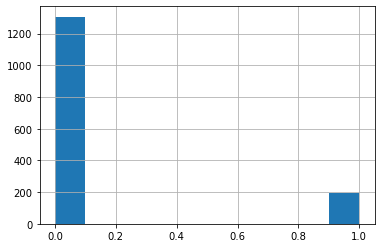

In [62]:
#Importación de la funcion matpolib inline que permite graficar una única sección
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
df1['hazardous'].hist()

Podemos observar en el histograma de la variable objetivo se obtiene la distribución en donde es una variable categorica donde 0 significa false y 1 significa true

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1500 non-null   int64  
 1   name                1500 non-null   int32  
 2   est_diameter_min    1500 non-null   float64
 3   est_diameter_max    1500 non-null   float64
 4   relative_velocity   1500 non-null   float64
 5   miss_distance       1500 non-null   int64  
 6   orbiting_body       1500 non-null   int32  
 7   sentry_object       1500 non-null   int64  
 8   absolute_magnitude  1500 non-null   float64
 9   hazardous           1500 non-null   int64  
dtypes: float64(4), int32(2), int64(4)
memory usage: 105.6 KB


**Procesamiento de datos, transformaciones previas**

In [64]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
#Transformación de las caracteristicas
# Variable objetivo y variables de entrada
VariablesEntrada=['id', 'name', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance','miss_distance','miss_distance','sentry_object','sentry_object']
VariableObjetivo=['hazardous']
X=df1[VariablesEntrada]
y=df1[VariableObjetivo]

In [65]:
### Estandarización de la data ###
#Importar la loibreria para la estandización
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [66]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [67]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [68]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Divida los datos en un conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1050, 10)
(1050, 1)
(450, 10)
(450, 1)


## Modelamiento

In [70]:
#Códo del modelo
# create Decision Tree classifier object
clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

ValueError: Unknown label type: 'continuous'

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 